# 스타벅스, 이디야 분포도 조사

## config

In [317]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('default')
plt.rc("font", family="Malgun Gothic")
plt.rc('axes', unicode_minus=False)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')



## preprocessing

In [318]:
# df = pd.read_csv('./Merchant/상가업소정보_201912_01.csv', sep='|')
# n = df.isnull().sum()
# not_use = n.sort_values(ascending=False).head(9)
# not_use_col = not_use.index
# df = df.drop(not_use_col, axis=1)
# cols = df.columns
# codeAndNum = cols[cols.str.contains('코드|번호')]
# df = df.drop(codeAndNum, axis=1)
# df = df.drop(['대지구분명', '지번본번지', '지번주소', '도로명', '건물본번지'], axis=1)
# df_seoul = df[df['시도명'] == '서울특별시']
# df_seoul.head(2)

In [319]:
df_seoul = pd.read_csv('./seoul_open_store.csv') # 위 셀을 통해 이미 export한 csv파일 참조
df_seoul.head(2)

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 선릉로93길 6,127.047883,37.505675


### 스타벅스와 이디야 필터링 -> df_cafe

In [320]:
df_seoul['상호명_소문자'] = df_seoul['상호명'].str.lower() # 소문자로 변경한 값들 새로운 컬럼으로 

In [321]:
df_cafe = df_seoul[df_seoul['상호명_소문자'].str.contains('스타벅스|starbucks|이디야|ediya')]

### '브랜드명'  컬럼 추가 후 '스타벅스', '이디야' 추가

In [322]:
df_cafe.loc[df_cafe['상호명_소문자'].str.contains('스타벅스|starbuck'), '브랜드명'] = '스타벅스'
df_cafe.loc[~df_cafe['상호명_소문자'].str.contains('스타벅스|starbuck'), '브랜드명'] = '이디야' # == df_cafe['브랜드명'] = df_cafe['브랜드명'].fillna('이디야')

c:\users\java01\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\java01\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [323]:
df_cafe['브랜드명'].value_counts()

스타벅스    506
이디야     504
Name: 브랜드명, dtype: int64

### '상권업종대분류명', '상권업종중분류명'이 맞지않은 레코드는 삭제
--- 

#### '상권업종대분류명' value_counts로 음식이 아닌 값 확인하여 삭제

In [324]:
df_cafe['상권업종대분류명'].value_counts()

음식       1008
생활서비스       2
Name: 상권업종대분류명, dtype: int64

In [325]:
df_cafe = df_cafe[~df_cafe['상권업종대분류명'].isin(['생활서비스'])]

In [326]:
df_cafe['상권업종대분류명'].value_counts()

음식    1008
Name: 상권업종대분류명, dtype: int64

#### '상권업종중분류명' value_counts로 음식이 아닌 값 확인하여 삭제

In [327]:
df_cafe['상권업종중분류명'].value_counts()

커피점/카페    1007
패스트푸드        1
Name: 상권업종중분류명, dtype: int64

In [328]:
df_cafe[df_cafe['상권업종중분류명'] != '커피점/카페']

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자,브랜드명
351099,이디야문래씨지브이,음식,패스트푸드,패스트푸드,서울특별시,영등포구,문래동,문래동3가,서울특별시 영등포구 문래로 164,126.90006,37.517781,이디야문래씨지브이,이디야


In [329]:
# 확인해보니 중분류가 '패스트푸드'인 '이디야문래씨지브이'도 이디야인 걸로 확인되어짐. => 대상데이터 포함(미삭제)

## Visualization

### seaborn countplot

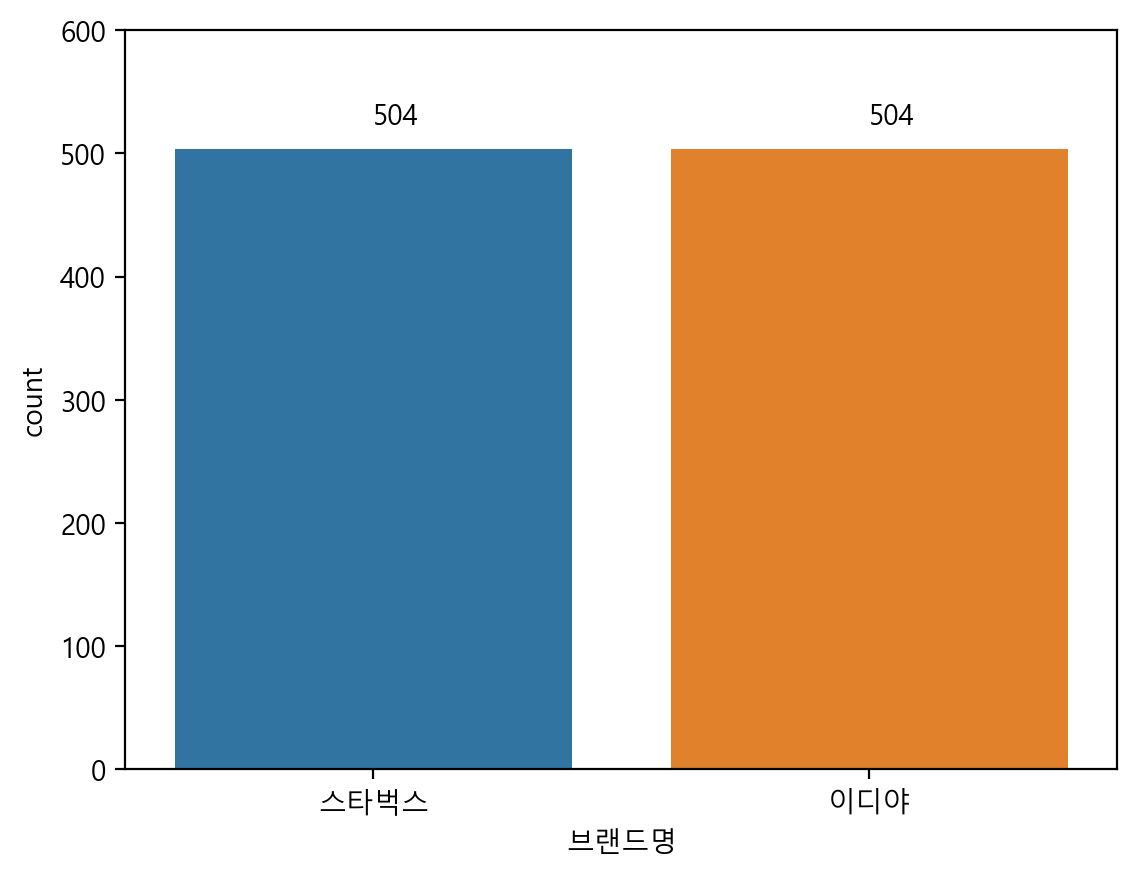

In [330]:
import numpy as np

g = sns.countplot(data = df_cafe, x='브랜드명')

brand_count = df_cafe['브랜드명'].value_counts()

g.set_yticks(np.arange(0, 700, 100))

for i, val in enumerate(brand_count.index) :
    g.text(x=i, y=brand_count[i]+20, s=brand_count[i])

### seaborn countplot 시군구명별 막대 그래프

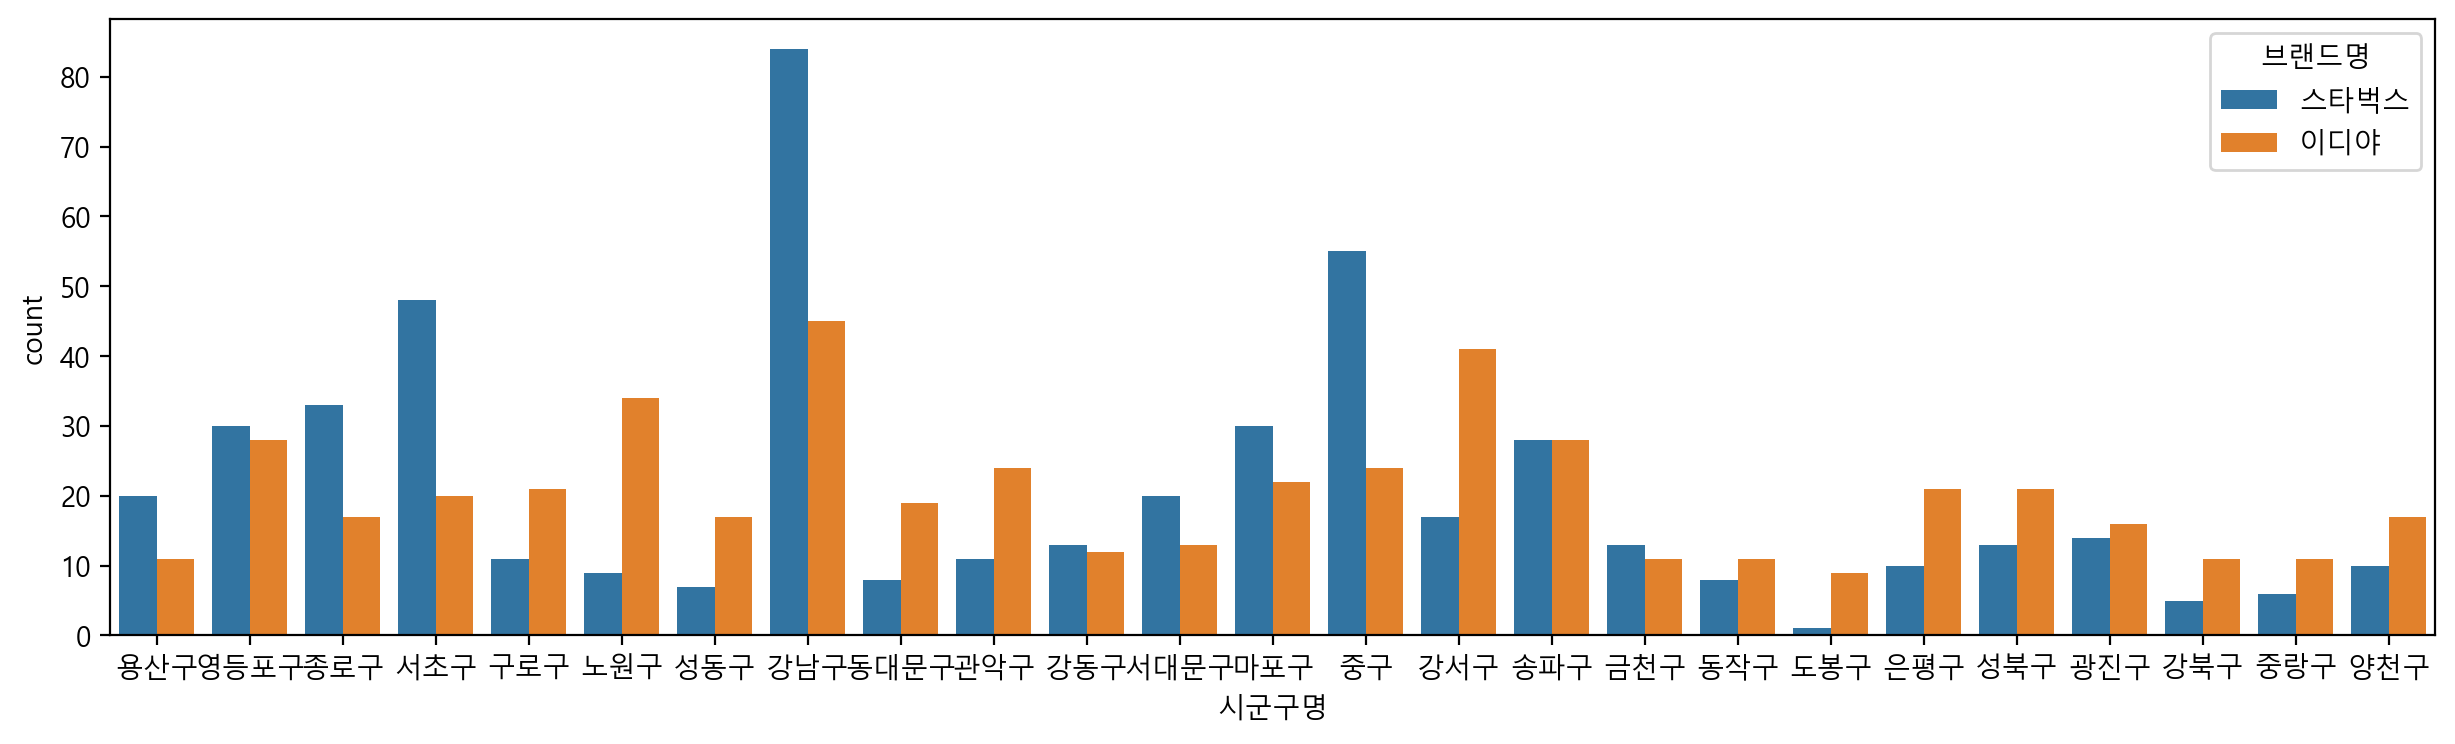

In [331]:
plt.figure(figsize=(15, 4))
g = sns.countplot(data = df_cafe, x='시군구명', hue='브랜드명')

### seaborn scatterplot

<AxesSubplot:xlabel='경도', ylabel='위도'>

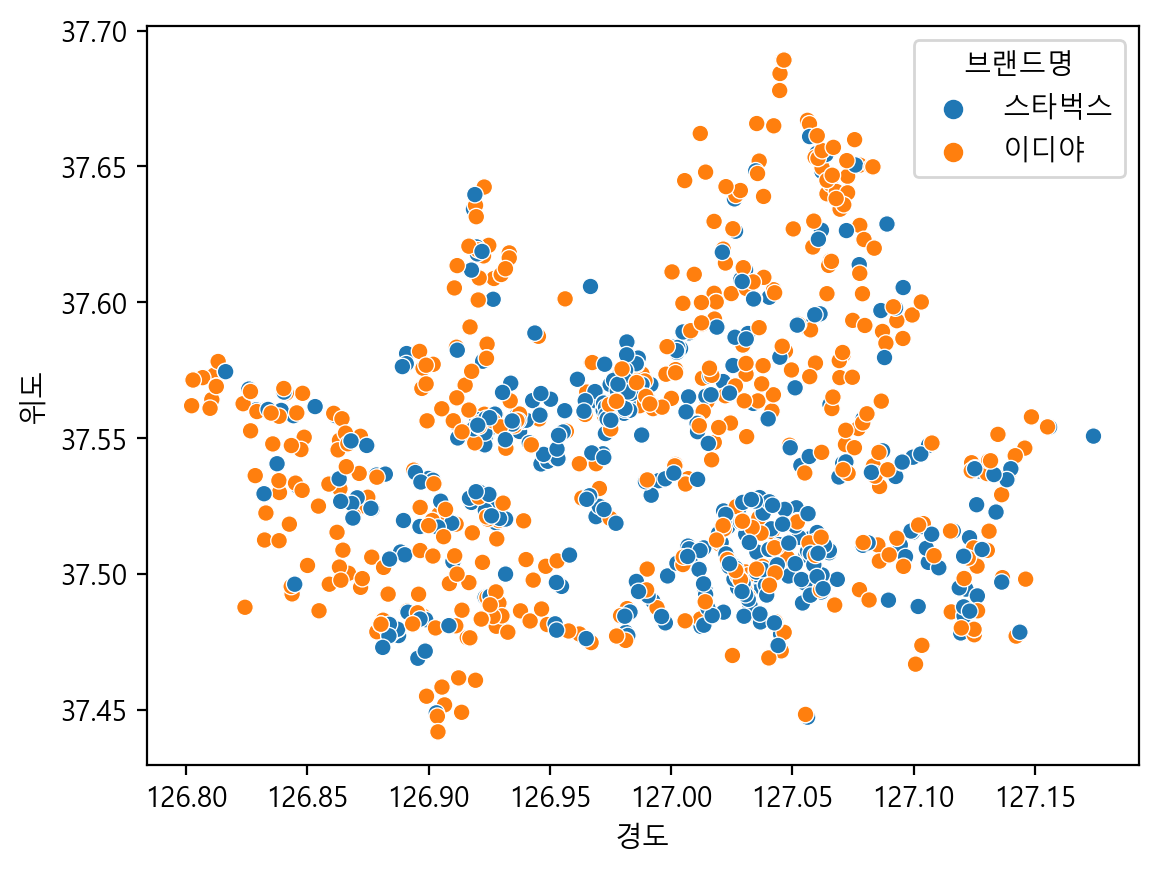

In [332]:
sns.scatterplot(data=df_cafe, x='경도', y='위도', hue='브랜드명')

### folium - MarkerCluster

In [333]:
import folium

# 중앙값 = 각각 쳥균값
centerLat, centerLong = df_cafe['위도'].mean(), df_cafe['경도'].mean()

from folium.plugins import MarkerCluster
m = folium.Map(
    [centerLat, centerLong]
    , zoom_start=12
)

marker_coluster = MarkerCluster().add_to(m)

for i in df_cafe.index[:] :
    title = df_cafe.loc[i, '상호명'] + ' - (' + df_cafe.loc[i, '도로명주소'] + ')'
    lat = df_cafe.loc[i, '위도']
    long = df_cafe.loc[i, '경도']
    
    icon_color = 'black'
    if df_cafe.loc[i, '브랜드명'] == '이디야' :
        icon_color = 'darkblue'
    elif df_cafe.loc[i, '브랜드명'] == '스타벅스' :
        icon_color = 'darkgreen'
        
    folium.Marker(
        [lat, long]
        , icon=folium.Icon(color=icon_color)
        , tooltip = title
        
    ).add_to(marker_coluster)

m

### folium - MarkerCluster modify tiles

In [334]:
import folium

# 중앙값 = 각각 쳥균값
centerLat, centerLong = df_cafe['위도'].mean(), df_cafe['경도'].mean()

from folium.plugins import MarkerCluster
m = folium.Map(
    [centerLat, centerLong]
    , zoom_start=12
    , tiles='Stamen Toner'
)

marker_coluster = MarkerCluster().add_to(m)

for i in df_cafe.index[:] :
    title = df_cafe.loc[i, '상호명'] + ' - (' + df_cafe.loc[i, '도로명주소'] + ')'
    lat = df_cafe.loc[i, '위도']
    long = df_cafe.loc[i, '경도']
    
    icon_color = 'black'
    if df_cafe.loc[i, '브랜드명'] == '이디야' :
        icon_color = 'darkblue'
    elif df_cafe.loc[i, '브랜드명'] == '스타벅스' :
        icon_color = 'darkgreen'
        
    folium.Marker(
        [lat, long]
        , icon=folium.Icon(color=icon_color)
        , tooltip = title
        
    ).add_to(marker_coluster)

m

# 행정구역별 시각화
--- 
* 구별로 매장수를 표현하기위해 GeoJSON파일 로드
    - 파일 출처 : https://github.com/southkorea/seoul-maps
    - download url : https://drive.google.com/open?id=13j8-_XLdPe0pptsqu8-uyE-0Ym6V2jw5 (서울시 구단위)

## 행정구역 내 매장수

### preprocessing

##### 구별, 브랜드별 점포수

In [335]:
df_cafe_byGuBrand = df_cafe.groupby(by=['시군구명', '브랜드명'])['상호명'].count().reset_index()

### Visualization

#### JSON기반 행정구역 경계 

In [336]:
import json
geo_json = json.load(open('./geo/seoul_municipalities_geo_simple.json', encoding='utf-8'))

#### 브랜드별로 필터

In [337]:
df_star, df_edi = df_cafe_byGuBrand[df_cafe_byGuBrand['브랜드명'] == '스타벅스'], df_cafe_byGuBrand[df_cafe_byGuBrand['브랜드명'] == '이디야']

#### 스타벅스 매장수 

In [338]:
import folium

centerLat, centerLong = df_cafe['위도'].mean(), df_cafe['경도'].mean()
m = folium.Map([centerLat, centerLong], zoom_start=11.5)

folium.Choropleth(
    geo_data=geo_json
    , name='choropleth'
    , data=df_star
    , columns=['시군구명', '상호명']
    , key_on='feature.properties.name'
    , fill_color='YlGn'
    , fill_opacity=0.7
    , line_opacity=0.2
    , legend_name='스타벅스 매장수'
).add_to(m)

m

#### 이디야 매장수 

In [339]:
import folium

centerLat, centerLong = df_cafe['위도'].mean(), df_cafe['경도'].mean()
m = folium.Map([centerLat, centerLong], zoom_start=11.5)

folium.Choropleth(
    geo_data=geo_json
    , name='choropleth'
    , data=df_edi
    , columns=['시군구명', '상호명']
    , key_on='feature.properties.name'
    , fill_color='Blues'
    , fill_opacity=0.7
    , line_opacity=0.2
    , legend_name='이디야 매장수'
).add_to(m)

m

## 행정구역 특정매장별 점유여부

### preprocessing

#### pivot

In [340]:
df_vs = df_cafe_byGuBrand.pivot(index='시군구명', columns='브랜드명', values='상호명')
df_vs.head()

브랜드명,스타벅스,이디야
시군구명,,
강남구,84,45
강동구,13,12
강북구,5,11
강서구,17,41
관악구,11,24


#### 매장수 비교

In [341]:
df_vs['매장수비교'] = df_vs['스타벅스'] - df_vs['이디야'] > 0
df_vs['매장수비교'] = df_vs['매장수비교'].astype(float)

df_vs.head()

브랜드명,스타벅스,이디야,매장수비교
시군구명,,,
강남구,84,45,1.0
강동구,13,12,1.0
강북구,5,11,0.0
강서구,17,41,0.0
관악구,11,24,0.0


#### '시군구명'을 컬럼명으로

In [342]:
df_vs = df_vs.reset_index()
df_vs.head()

브랜드명,시군구명,스타벅스,이디야,매장수비교
0,강남구,84,45,1.0
1,강동구,13,12,1.0
2,강북구,5,11,0.0
3,강서구,17,41,0.0
4,관악구,11,24,0.0


### Visualization

In [343]:
import folium

m = folium.Map([lat, long], tiles='stamen toner', zoom_start=12)

folium.Choropleth(
    geo_data=geo_json
    , name='choropleth'
    , data=df_vs
    , columns=['시군구명', '매장수비교']
    , key_on='feature.properties.name'
    , fill_color='BuGn'
    , fill_opacity=0.7
    , line_opacity=0.9
    , legend_name='매장수 비교'
).add_to(m)

m